In [2]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/vinay/OneDrive/Documents/Mall_Customers.csv' 
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

# Get basic information about the dataset
print(data.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [3]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(data.isnull().sum())

# Select relevant features for segmentation
# Assuming columns include 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to a DataFrame for better readability
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
print(scaled_features_df.head())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

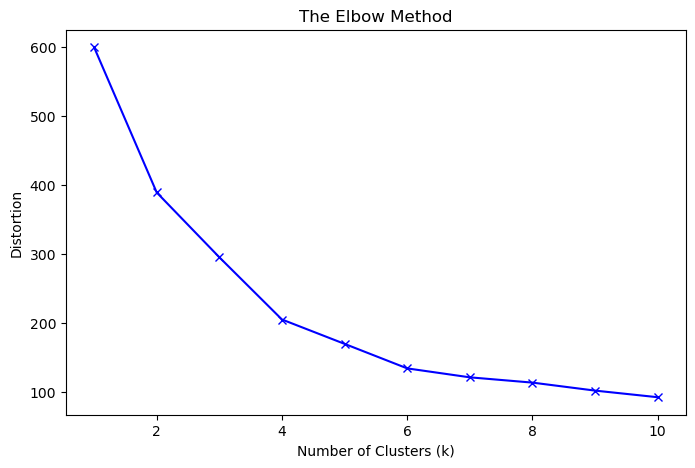

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate distortions for different k values
distortions = []
K = range(1, 11)  # Test k from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()


In [16]:
# Apply K-Means with the optimal number of clusters
optimal_k = 5  # Replace with the chosen k from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


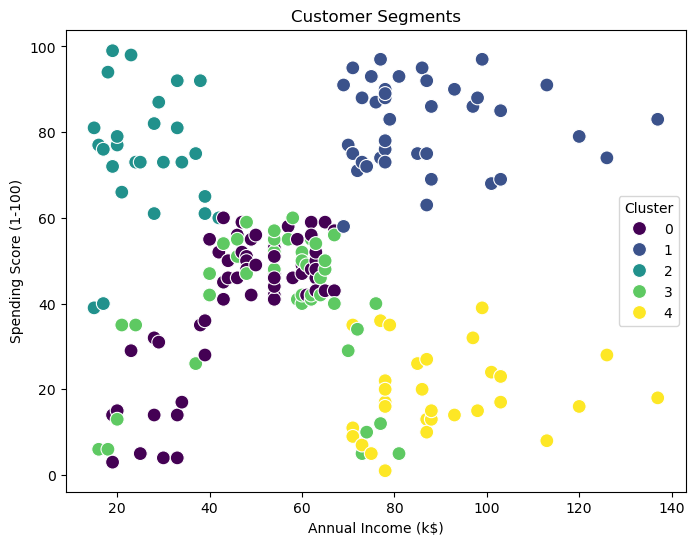

In [17]:
import seaborn as sns

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Annual Income (k$)'], 
                y=data['Spending Score (1-100)'], 
                hue=data['Cluster'], 
                palette='viridis', 
                s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()




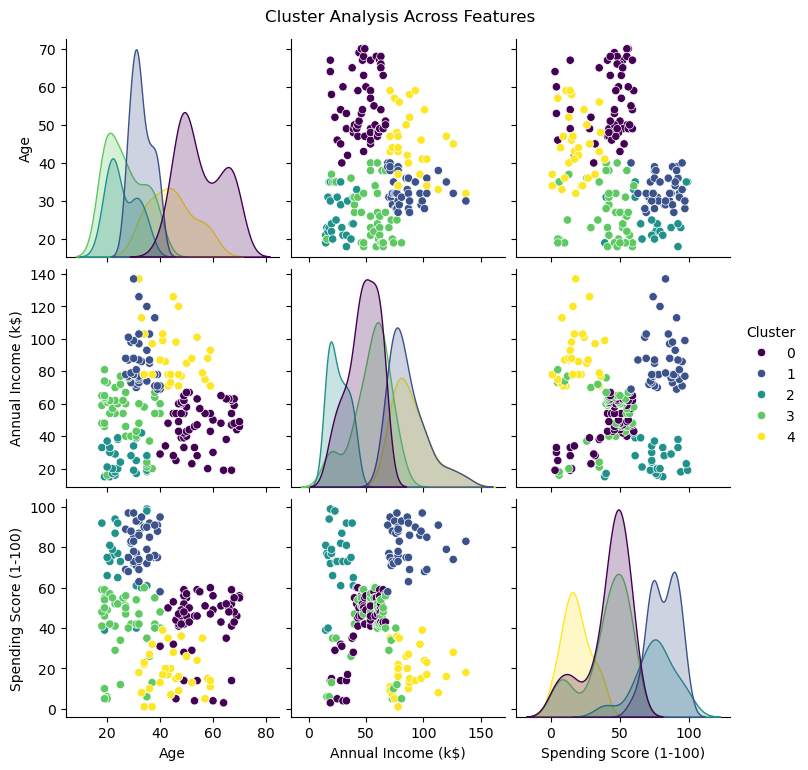

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize clusters
sns.pairplot(data, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Cluster Analysis Across Features', y=1.02)
plt.show()



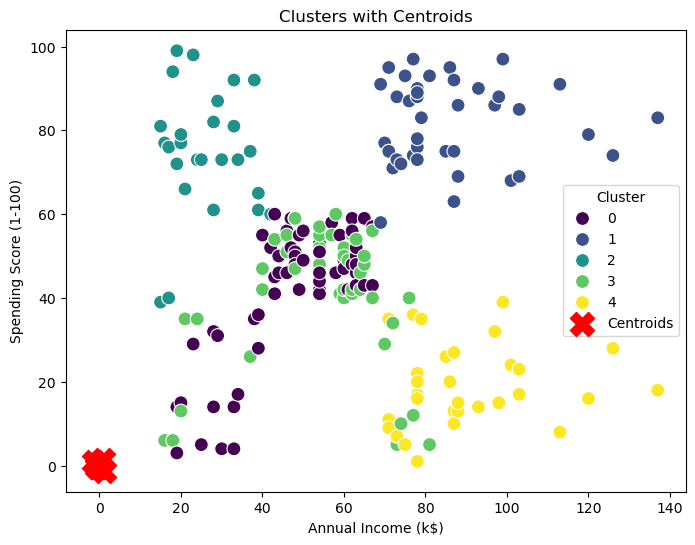

In [19]:
# Add cluster centroids to the plot
centroids = kmeans.cluster_centers_

# Scatter plot with centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis', s=100)
plt.scatter(centroids[:, 1], centroids[:, 2], s=300, c='red', marker='X', label='Centroids')
plt.title('Clusters with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

C:\Users\vinay\AppData\Local\Temp\ipykernel_12976\918833382.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


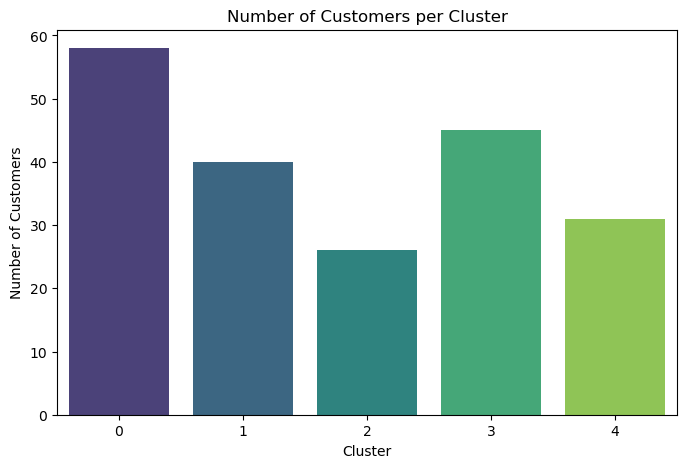

In [20]:
# Count the number of customers in each cluster
cluster_counts = data['Cluster'].value_counts()

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


C:\Users\vinay\AppData\Local\Temp\ipykernel_12976\16375532.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=data, palette='viridis')


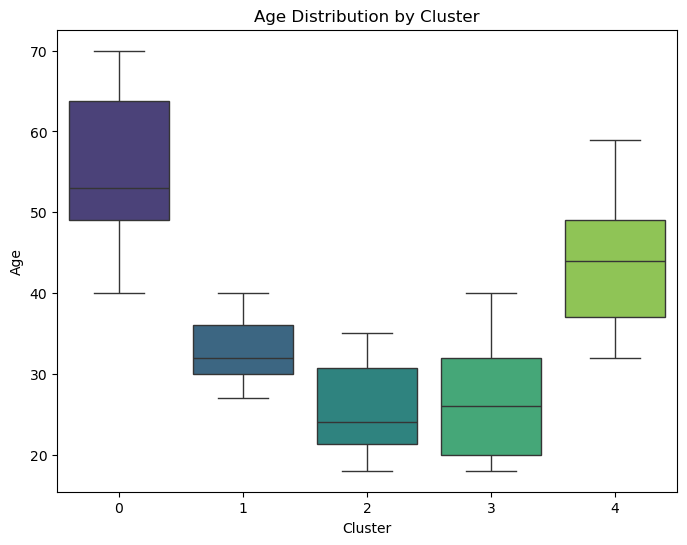

In [21]:
# Boxplot for Age across clusters
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Age', data=data, palette='viridis')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()


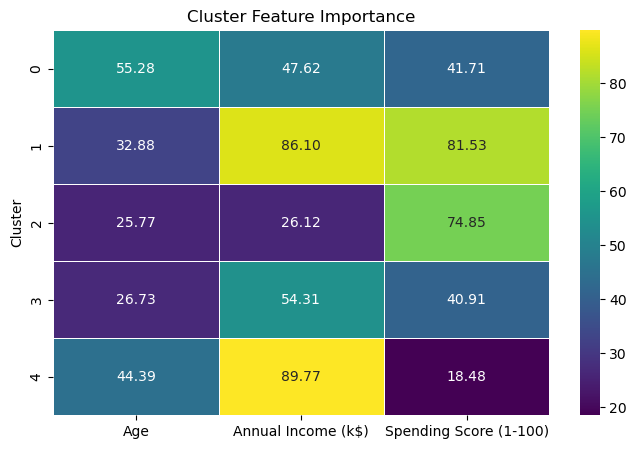

In [22]:
# Calculate mean values of features for each cluster
cluster_means = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_means, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Cluster Feature Importance')
plt.show()



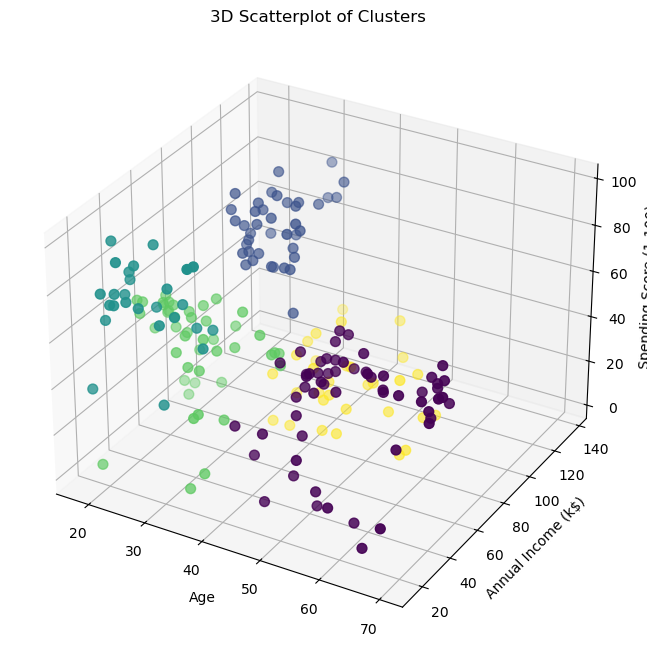

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatterplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], 
           c=data['Cluster'], cmap='viridis', s=50)

ax.set_title('3D Scatterplot of Clusters')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()
